In [21]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf



# Carregamento dos dados

In [2]:
import yfinance as yf

# Escolher o ticker da empresa, por exemplo, 'AAPL' para Apple
ticker = 'AAPL'

# Baixar os dados financeiros
dados = yf.download(ticker, start='2020-01-01', end='2021-01-01')

# Exibir os dados
print(dados)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   73.059433   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.349152   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.925629   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.582649   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.750244   
...                ...         ...         ...         ...         ...   
2020-12-24  131.320007  133.460007  131.100006  131.970001  129.514481   
2020-12-28  133.990005  137.339996  133.509995  136.690002  134.146622   
2020-12-29  138.050003  138.789993  134.339996  134.869995  132.360489   
2020-12-30  135.580002  135.990005  133.399994  133.720001  131.231934   
2020-12-31  134.080002  134.740005  131.720001  132.690002  130.221085   

               Volume  
Date         

# Análise Exploratória

In [4]:
dados

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059433,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349152,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514481,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146622,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.360489,121047300


In [7]:
serie_temporal = dados['Adj Close']

In [9]:
resultado = adfuller(serie_temporal)

In [11]:
print('ADF Statistic:', resultado[0])
print('p-value:', resultado[1])
print('Critical Values:')
for key, value in resultado[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -0.13401354944689345
p-value: 0.9459434904221139
Critical Values:
   1%: -3.4566744514553016
   5%: -2.8731248767783426
   10%: -2.5729436702592023


In [12]:
if resultado[1] < 0.05:
    print("A série temporal é estacionária (rejeita a hipótese nula).")
else:
    print("A série temporal não é estacionária (não rejeita a hipótese nula).")

A série temporal não é estacionária (não rejeita a hipótese nula).


# Pré-processamento

# Treinamento do modelo

# Avaliação do modelo

## Series Autocorrelation function for sazonality verify

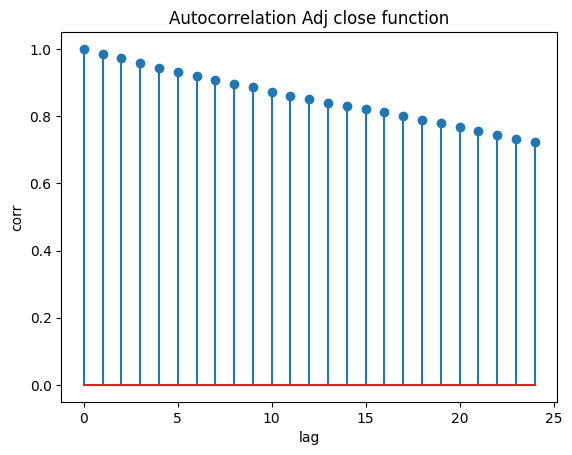

In [20]:
autocorr = acf(dados["Adj Close"])

plt.stem(autocorr)
plt.title("Autocorrelation Adj close function")

plt.show()

In [22]:
dados['Adj Close Diff'] = dados['Adj Close'].diff()
dados = dados.dropna()

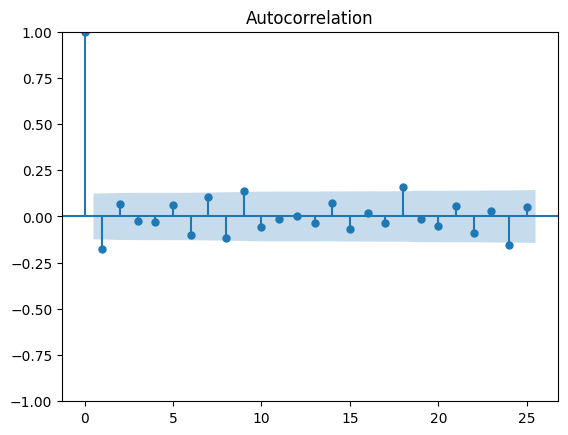

In [25]:
plot_acf(dados['Adj Close Diff'], lags=25)
plt.show()

Text(0.5, 1.0, 'Adj Close')

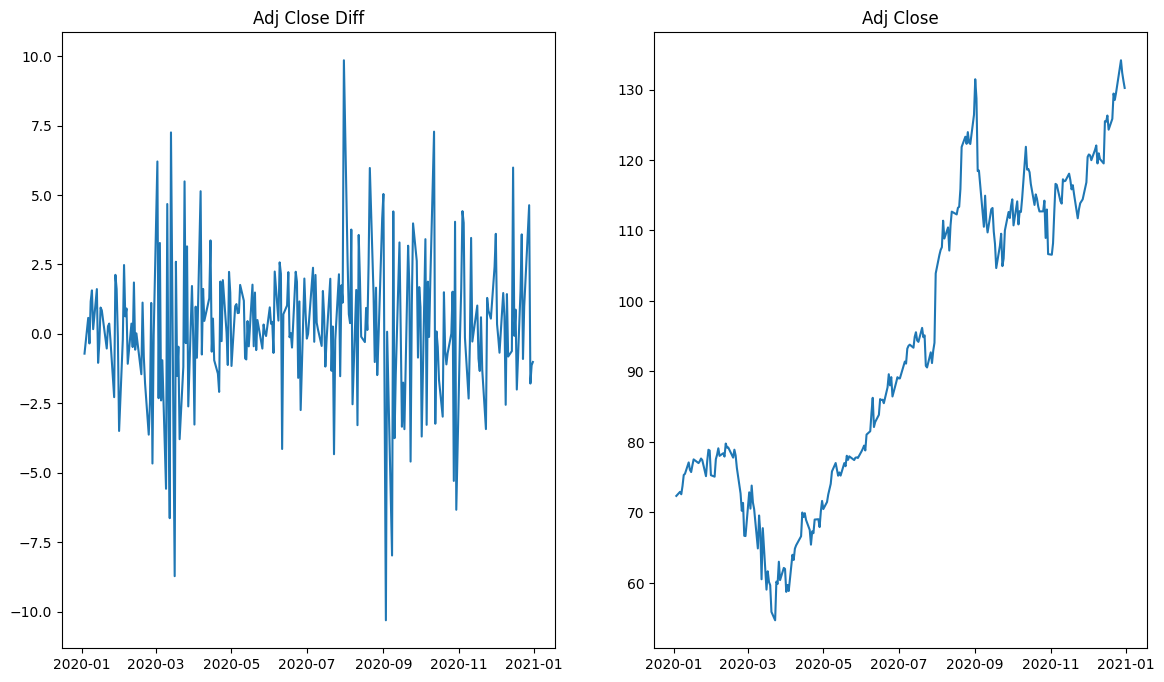

In [59]:
fig, ax = plt.subplots(1, 2, figsize = (14, 8), width_ratios=[0.5, 0.5])

ax[0].plot(dados["Adj Close Diff"])
ax[0].set_title("Adj Close Diff")

ax[1].plot(dados["Adj Close"])
ax[1].set_title("Adj Close")
